# Exploratory data analysis

In [1]:
import kagglehub

In [2]:
path = kagglehub.dataset_download("rkiattisak/salaly-prediction-for-beginer")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'salaly-prediction-for-beginer' dataset.
Path to dataset files: /kaggle/input/salaly-prediction-for-beginer


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [31]:
df = pd.read_csv(f"{path}/Salary Data.csv")

In [32]:
df.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


In [33]:
df.isnull().sum()

,0
Age,2
Gender,2
Education Level,2
Job Title,2
Years of Experience,2
Salary,2


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375 entries, 0 to 374
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  373 non-null    float64
 1   Gender               373 non-null    object 
 2   Education Level      373 non-null    object 
 3   Job Title            373 non-null    object 
 4   Years of Experience  373 non-null    float64
 5   Salary               373 non-null    float64
dtypes: float64(3), object(3)
memory usage: 17.7+ KB


In [35]:
df.describe()

,Age,Years of Experience,Salary
count,373.000000,373.000000,373.000000
mean,37.431635,10.030831,100577.345845
std,7.069073,6.557007,48240.013482
min,23.000000,0.000000,350.000000
25%,31.000000,4.000000,55000.000000
50%,36.000000,9.000000,95000.000000
75%,44.000000,15.000000,140000.000000
max,53.000000,25.000000,250000.000000


In [36]:
df[df.isnull().any(axis=1)]

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
172,NaN,NaN,NaN,NaN,NaN,NaN
260,NaN,NaN,NaN,NaN,NaN,NaN


In [37]:
df = df.dropna().reset_index(drop=True)

In [38]:
df.describe()

,Age,Years of Experience,Salary
count,373.000000,373.000000,373.000000
mean,37.431635,10.030831,100577.345845
std,7.069073,6.557007,48240.013482
min,23.000000,0.000000,350.000000
25%,31.000000,4.000000,55000.000000
50%,36.000000,9.000000,95000.000000
75%,44.000000,15.000000,140000.000000
max,53.000000,25.000000,250000.000000


In [39]:
df.isnull().sum()

,0
Age,0
Gender,0
Education Level,0
Job Title,0
Years of Experience,0
Salary,0


In [ ]:
df["Age"].value_counts()

In [41]:
df["Age"].unique()

array([32., 28., 45., 36., 52., 29., 42., 31., 26., 38., 48., 35., 40.,
       27., 44., 33., 39., 25., 51., 34., 47., 30., 41., 37., 24., 43.,
       50., 46., 49., 23., 53.])

In [43]:
df["Age"] = df["Age"].astype(int)

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373 entries, 0 to 372
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  373 non-null    int64  
 1   Gender               373 non-null    object 
 2   Education Level      373 non-null    object 
 3   Job Title            373 non-null    object 
 4   Years of Experience  373 non-null    float64
 5   Salary               373 non-null    float64
dtypes: float64(2), int64(1), object(3)
memory usage: 17.6+ KB


In [45]:
from sklearn.preprocessing import LabelEncoder

In [47]:
df["Gender"].unique()

array(['Male', 'Female'], dtype=object)

In [48]:
df["Gender"].value_counts()

,count
Gender,
Male,194
Female,179


In [49]:
label_encoder = LabelEncoder()
df["Gender"] = label_encoder.fit_transform(df["Gender"])
# 1 for male , 0 for female

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373 entries, 0 to 372
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  373 non-null    int64  
 1   Gender               373 non-null    int64  
 2   Education Level      373 non-null    object 
 3   Job Title            373 non-null    object 
 4   Years of Experience  373 non-null    float64
 5   Salary               373 non-null    float64
dtypes: float64(2), int64(2), object(2)
memory usage: 17.6+ KB


In [54]:
df["Education Level"].unique()

array(["Bachelor's", "Master's", 'PhD'], dtype=object)

In [55]:
from sklearn.preprocessing import OrdinalEncoder

In [57]:
ordinal_encoder = OrdinalEncoder(categories=[["Bachelor's", "Master's", "PhD"]])
df["Education Level"] = ordinal_encoder.fit_transform(df[["Education Level"]])

In [60]:
df["Education Level"].value_counts()

,count
Education Level,
0.0,224
1.0,98
2.0,51


In [62]:
df.sample(5)

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
206,39,0,0.0,Senior Operations Manager,10.0,120000.0
71,39,0,0.0,Recruiter,11.0,70000.0
64,26,1,0.0,Junior Accountant,1.0,35000.0
104,39,0,1.0,Senior Project Coordinator,13.0,80000.0
173,26,0,1.0,Junior Data Scientist,1.5,45000.0


In [ ]:
df["Job Title"].unique()

In [64]:
df["Years of Experience"].unique()

array([ 5. ,  3. , 15. ,  7. , 20. ,  2. , 12. ,  4. ,  1. , 10. , 18. ,
        6. , 14. , 16. ,  0. , 22. , 19. ,  9. , 13. , 11. , 25. , 21. ,
        8. , 17. , 23. , 24. ,  0.5,  1.5])

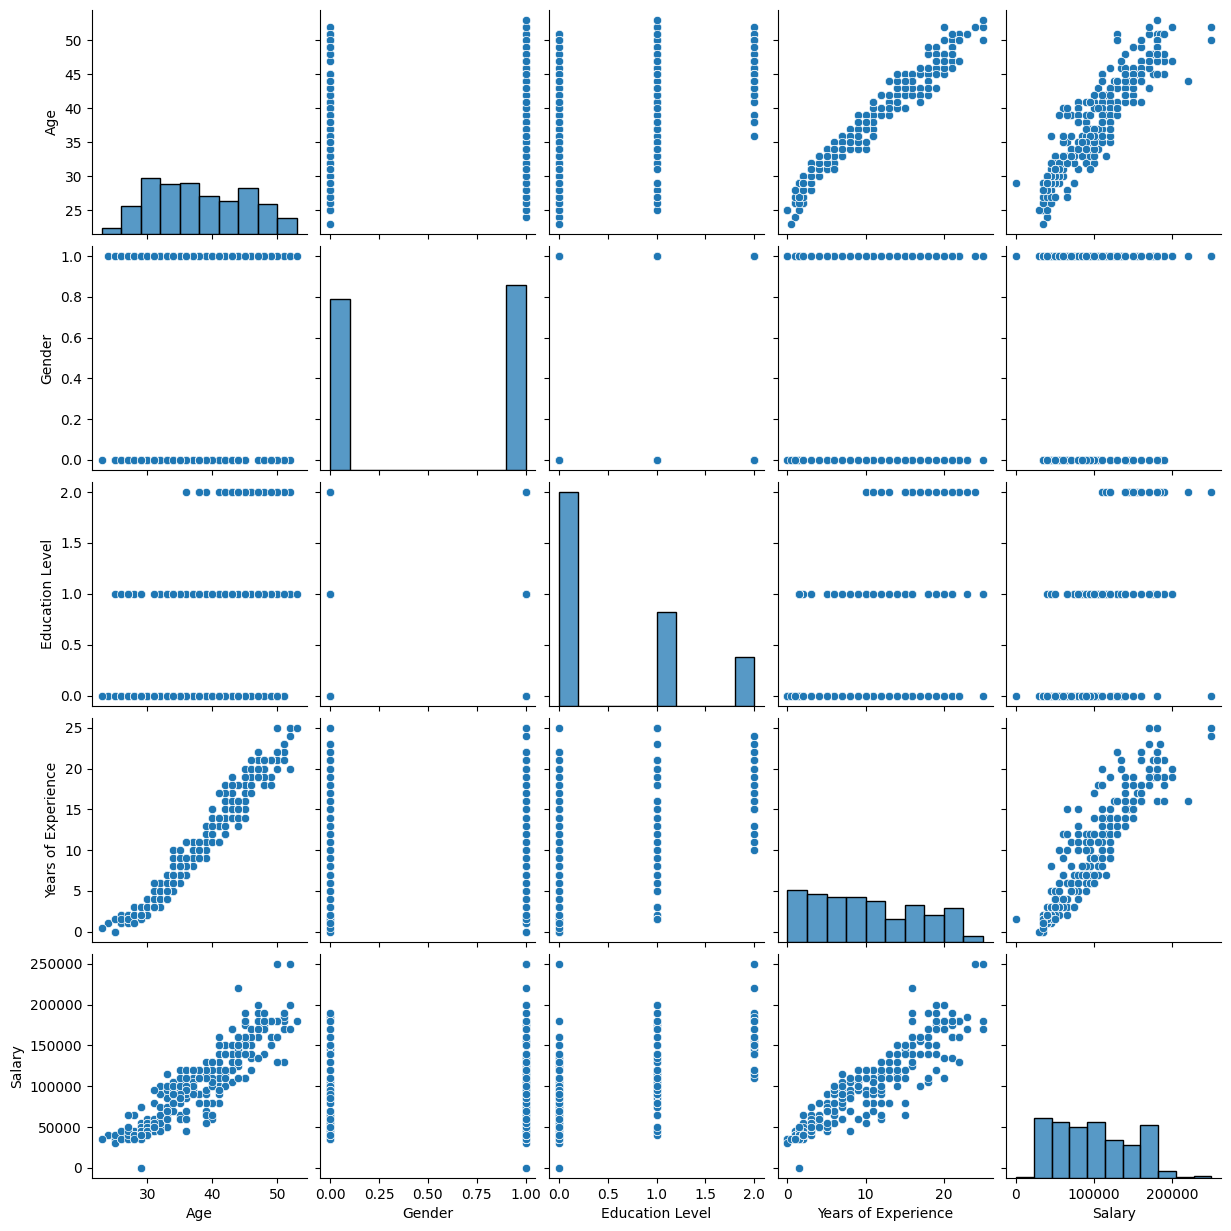

In [66]:
sns.pairplot(df)
plt.show()

In [65]:
from sklearn.model_selection import train_test_split

In [72]:
X = df.drop("Salary", axis=1)
y = df["Salary"]

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

<function matplotlib.pyplot.show(close=None, block=None)>

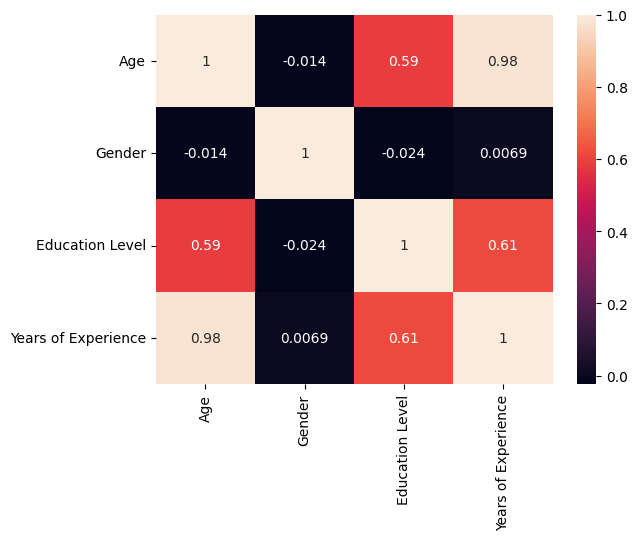

In [74]:
sns.heatmap(X_train.drop("Job Title", axis=1).corr(), annot=True)
plt.show

In [75]:
def correlation_for_dropping(df, threshold):
    columns_to_drop = set()
    corr = df.corr()
    for i in range(len(corr.columns)):
        for j in range(i):
            if abs(corr.iloc[i, j]) > threshold:
                columns_to_drop.add(corr.columns[i])
    return columns_to_drop

In [77]:
columns_drop = correlation_for_dropping(X_train.drop("Job Title", axis=1), 0.85)

In [78]:
columns_drop

{'Years of Experience'}

In [79]:
X_train = X_train.drop("Years of Experience", axis=1)

In [80]:
X_test = X_test.drop("Years of Experience", axis=1)

In [81]:
X_train

,Age,Gender,Education Level,Job Title
192,34,1,0.0,Senior Product Manager
75,37,1,0.0,Project Manager
84,29,0,0.0,Junior Designer
361,33,1,0.0,Junior Marketing Specialist
16,33,0,1.0,Marketing Manager
...,...,...,...,...
71,39,0,0.0,Recruiter
106,30,0,0.0,Digital Content Producer
270,37,1,0.0,Senior Financial Analyst
348,44,0,2.0,Senior Data Scientist


In [82]:
y_train

,Salary
192,95000.0
75,95000.0
84,40000.0
361,70000.0
16,90000.0
...,...
71,70000.0
106,50000.0
270,90000.0
348,160000.0


In [84]:
from sklearn.preprocessing import StandardScaler

In [86]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train.drop("Job Title", axis=1))
X_test = scaler.transform(X_test.drop("Job Title", axis=1))

In [89]:
from sklearn.metrics import r2_score

In [92]:
from sklearn.linear_model import LinearRegression
linear_regression = LinearRegression()
linear_regression.fit(X_train, y_train)
y_pred = linear_regression.predict(X_test)
score = r2_score(y_test, y_pred=y_pred)
print("R2 Score: ", score)

R2 Score:  0.88525736214496


In [94]:
from sklearn.linear_model import Lasso
lasso = Lasso()
lasso.fit(X_train, y_train)
y_pred = lasso.predict(X_test)
score = r2_score(y_test, y_pred)
print("R2 Score: ", score)

R2 Score:  0.8852576943163628


In [105]:
from sklearn.linear_model import LassoCV
lasso_cv = LassoCV(cv=5)
lasso_cv.fit(X_train, y_train)
y_pred = lasso_cv.predict(X_test)
score = r2_score(y_test, y_pred)
print("R2 Score: ", score)

R2 Score:  0.8851527982814535


In [95]:
from sklearn.linear_model import Ridge
ridge = Ridge()
ridge.fit(X_train, y_train)
y_pred = ridge.predict(X_test)
score = r2_score(y_test, y_pred)
print("R2 Score: ", score)

R2 Score:  0.884945262030091


In [103]:
from sklearn.linear_model import RidgeCV
ridge_cv = RidgeCV(cv=5)
ridge_cv.fit(X_train, y_train)
y_pred = ridge_cv.predict(X_test)
score = r2_score(y_test, y_pred)
print("R2 Score: ", score)

R2 Score:  0.884945262030091


In [96]:
from sklearn.linear_model import ElasticNet
elasticnet = ElasticNet()
elasticnet.fit(X_train, y_train)
y_pred = elasticnet.predict(X_test)
score = r2_score(y_test, y_pred)
print("R2 Score: ", score)

R2 Score:  0.7965869520489027


In [98]:
from sklearn.linear_model import ElasticNetCV
elasticnet_cv = ElasticNetCV(cv=5)
elasticnet_cv.fit(X_train, y_train)
y_pred = elasticnet_cv.predict(X_test)
score = r2_score(y_test, y_pred)
print("R2 Score: ", score)

R2 Score:  0.05194094023350859


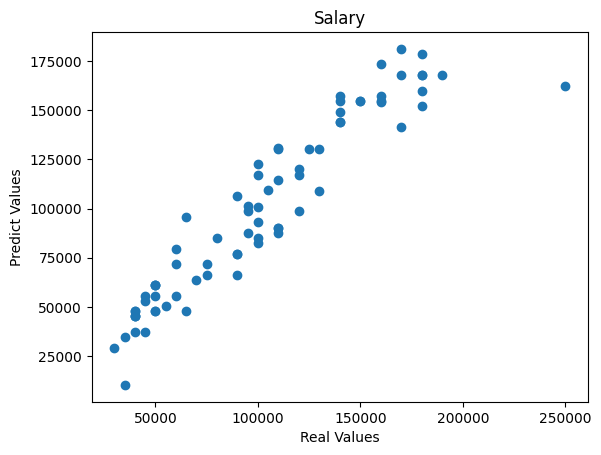

In [115]:
plt.scatter(y_test, y_pred)
plt.xlabel("Real Values")
plt.ylabel("Predict Values")
plt.title("Salary")
plt.show()

# Using Lazy Prediction

In [ ]:
!pip install lazypredict

In [ ]:
!pip show lazypredict

In [112]:
import lazypredict
from lazypredict.Supervised import LazyRegressor

reg = LazyRegressor(verbose=0, ignore_warnings=True, custom_metric=None)
models, predictions = reg.fit(X_train, X_test, y_train, y_test)

print(models)

  0%|          | 0/42 [00:00<?, ?it/s]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000046 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 36
[LightGBM] [Info] Number of data points in the train set: 298, number of used features: 3
[LightGBM] [Info] Start training from score 100101.845638
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain,